# Reload changes from files

In [1]:
%load_ext autoreload
%autoreload 2

# Import from files

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os


from BFS import BFS, visualize_path
from GenerateGrid import generate_grid
from Time import now, elapsed, current_time_hms
from SaveGraph import save_graph_and_results
from ImportGraph import read_input_file

# Make random grid and positions

In [3]:
def show_pos_in_grid(grid, start_pos, goal_pos):
    display_grid = np.array(grid, copy=True)
    x, y, _ = start_pos
    display_grid[y][x] = 8  # Mark the start position with an 8
    x, y = goal_pos
    display_grid[y][x] = 9  # Mark the goal position with a 9
    return display_grid

grid, start_pos, goal_pos = generate_grid(10, 10, wall_num=10)
print(grid)
print("Start position:", start_pos)
print("Goal position:", goal_pos)
print(show_pos_in_grid(grid, start_pos, goal_pos))

"""
wall_collision_directions = [
    (0, -1),  # North
    (0, 0),   # Center
    (-1, -1), # North-West
    (-1, 0)   # West
]
"""

[[0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 1 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
Start position: (5, 4, 3)
Goal position: (4, 7)
[[0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 8 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 9 1 0 0 0 0]
 [0 1 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


'\nwall_collision_directions = [\n    (0, -1),  # North\n    (0, 0),   # Center\n    (-1, -1), # North-West\n    (-1, 0)   # West\n]\n'

# Test BFS

In [4]:
"""
advance_directions = {
    0: (0, -1),  # North
    1: (1, 0),   # East
    2: (0, 1),   # South
    3: (-1, 0)   # West
}
"""

result = BFS(grid, start_pos, goal_pos)
length = len(result)
result.insert(0, length) # Insert path length at the start of the result
if result:
    path = result
    print("Path found:", path[1:])
    print("Number of explored nodes:", path[0])
else:
    print("No path found")

Path found: ['a1', 'G', 'a3']
Number of explored nodes: 3


# Generate test grids

In [5]:
def generate_test_grid(size=10, wall_num=10, n=10):
    """
    Generate multiple test grids with specified size and wall percentage.
    Args:
        size (int): Size of the grid (size x size).
        wall_num (int): Number of walls in the grid.
        n (int): Number of grids to generate.
    """
    grids = []
    for _ in range(n):
        grid, start_pos, goal_pos = generate_grid(M=size, N=size, wall_num=wall_num)
        grids.append((grid, start_pos, goal_pos))
    return grids


def test_BFS_on_multiple_grids(size=10, wall_num=10, n=10, output_time=""):
    """
    Test BFS algorithm on multiple generated grids.
    """
    if output_time == "":
        output_time = current_time_hms()
    graphs = []
    results = []
    counter = 0
    while counter < n: # We don't count unsolvable grids, so no for loop
        test_grid, start_pos, goal_pos = generate_test_grid(size, wall_num, 1)[0] # Generate a test grid

        start = now() # Start timer
        result = BFS(test_grid, start_pos, goal_pos) # Run BFS

        if result is None: # If no path found, we skip this grid
            continue

        length = len(result)
        result.insert(0, length) # Insert path length at the start of the result

        results.append((elapsed(start), result)) # Store time and result
        
        graphs.append((test_grid, start_pos, goal_pos)) # Store the graph to save later
        counter += 1

    save_graph_and_results(graphs, [result[1] for result in results], output_dir=f"saved_graphs/{output_time}/", file_time=output_time)
    return results, output_time



# Test by size

In [6]:
def test_by_size():
    output_time = current_time_hms()
    for i in range(10, 51, 10):
        results = test_BFS_on_multiple_grids(size=i, wall_num=10, n=10, output_time=output_time)
        avg_time = sum([res[0] for res in results]) / len(results)

        #print(f"Results: {results}")
        print(f"Average time for BFS on {len(results)} grids of size {i}x{i} with {i} walls: {avg_time:.6f} seconds.")

#test_by_size()


# Mettre les resultats dans un plot

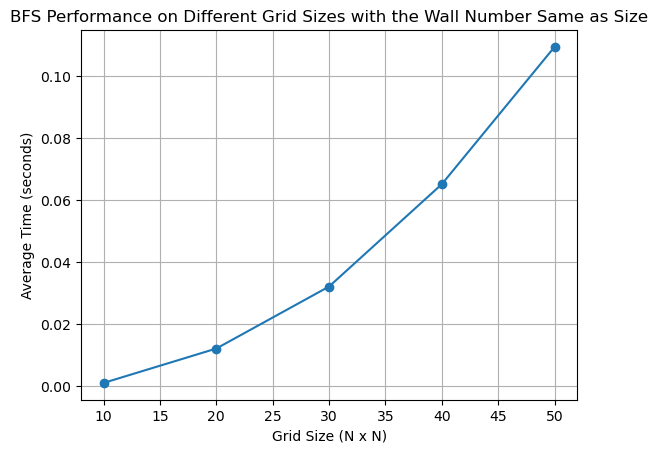

In [15]:
def plot_performance_for_size():

    sizes = list(range(10, 51, 10))
    times = []
    output_time = current_time_hms()
    for i in sizes:
        results, output_time = test_BFS_on_multiple_grids(size=i, wall_num=i, n=10, output_time=output_time)
        avg_time = sum([res[0] for res in results]) / len(results)
        times.append(avg_time)

    plt.plot(sizes, times, marker='o')
    plt.title('BFS Performance on Different Grid Sizes with the Wall Number Same as Size')
    plt.xlabel('Grid Size (N x N)')
    plt.ylabel('Average Time (seconds)')
    plt.grid(True)
    plt.show()
    return output_time

t1 = plot_performance_for_size()

# Test by wall number

In [8]:
def test_by_wall_number(size=20):
    output_time = current_time_hms()
    for i in range(10, 51, 10):
        results, output_time = test_BFS_on_multiple_grids(size=size, wall_num=i, n=10, output_time=output_time)
        avg_time = sum([res[0] for res in results]) / len(results)

        #print(f"Results: {results}")
        print(f"Average time for BFS on {len(results)} grids of size {size}x{size} with {i} walls: {avg_time:.6f} seconds.")
#test_by_wall_number()


# Mettre les resultats dans un plot

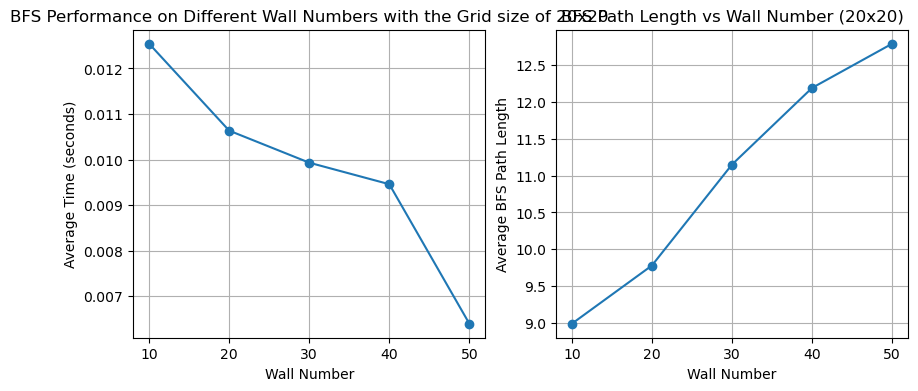

In [16]:
def plot_performance_for_wall_number(size=20):

    wall_numbers = list(range(10, 51, 10))
    times = []
    lengths = []
    output_time = current_time_hms()
    for i in wall_numbers:
        results, output_time = test_BFS_on_multiple_grids(size=size, wall_num=i, n=100, output_time=output_time)
        avg_time = sum([res[0] for res in results]) / len(results)
        times.append(avg_time)

        avg_length = sum([len(res[1]) if res[1] is not None else 0 for res in results]) / len(results)
        lengths.append(avg_length)

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(wall_numbers, times, marker='o')
    plt.title('BFS Performance on Different Wall Numbers with the Grid size of ' + str(size) + 'x' + str(size))
    plt.xlabel('Wall Number')
    plt.ylabel('Average Time (seconds)')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(wall_numbers, lengths, marker='o')
    plt.title(f'BFS Path Length vs Wall Number ({size}x{size})')
    plt.xlabel('Wall Number')
    plt.ylabel('Average BFS Path Length')
    plt.grid(True)

    plt.grid(True)
    plt.show()
    return output_time

t2 = plot_performance_for_wall_number()

# Test reading from a file 

In [10]:
def test_read_file(filename):
    instance = read_input_file(filename)
    instance = instance[0]  # Get the first instance for testing
    print(f"instance: {instance}")
    result = BFS(instance[0], instance[1], instance[2])
    print(f"result: {len(result)} {result}")
    visualize_path(instance[0], instance[1], instance[2], result)

test_read_file("test.txt")

instance: (array([[0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 1, 0]]), (2, 7, 2), (7, 2))
result: 12 ['D', 'a1', 'D', 'a3', 'a3', 'D', 'a3', 'a1', 'D', 'a1', 'G', 'a2']
. . . . . . # . . .
. * . . * * . . # .
. . . # . * . G . .
. . # . . . . . . .
. * . . . . # . . .
. . . . . # . . . .
. . . # # . . . . .
. * S . . . . . . .
# . . . . . . . # .


# Get older test files

In [11]:
def get_graph_and_result_files(output_time, output_dir="../saved_graphs/"):
    """
    Given an output_time, returns the corresponding graph file and result file paths.
    """
    if not output_dir.endswith('/'):
        output_dir += '/'
    
    # Construct file patterns
    graph_file = f"{output_dir}{output_time}_graph.txt"
    result_file = f"{output_dir}{output_time}_results.txt"

    # Check if files exist
    if not os.path.exists(graph_file):
        raise FileNotFoundError(f"Graph file not found: {graph_file}")
    if not os.path.exists(result_file):
        raise FileNotFoundError(f"Results file not found: {result_file}")

    return graph_file, result_file

def list_all_graph_and_result_files(output_dir="../saved_graphs/"):
    """
    Returns two lists: all graph file paths and corresponding result file paths
    in the given output directory.
    """
    if not output_dir.endswith('/'):
        output_dir += '/'

    graph_files = []
    result_files = []

    for filename in os.listdir(output_dir):
        if filename.endswith("_graph.txt"):
            graph_path = os.path.join(output_dir, filename)
            result_path = graph_path.replace("_graph.txt", "_results.txt")
            if os.path.exists(result_path):
                graph_files.append(graph_path)
                result_files.append(result_path)

    return graph_files, result_files

# Regenerate the same results reading the older files

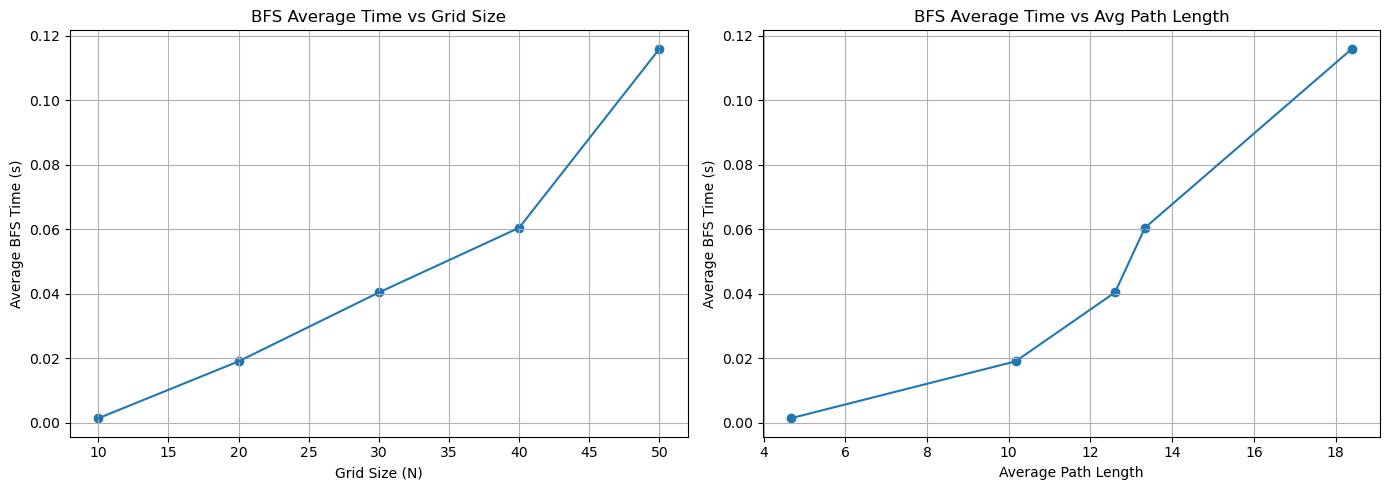

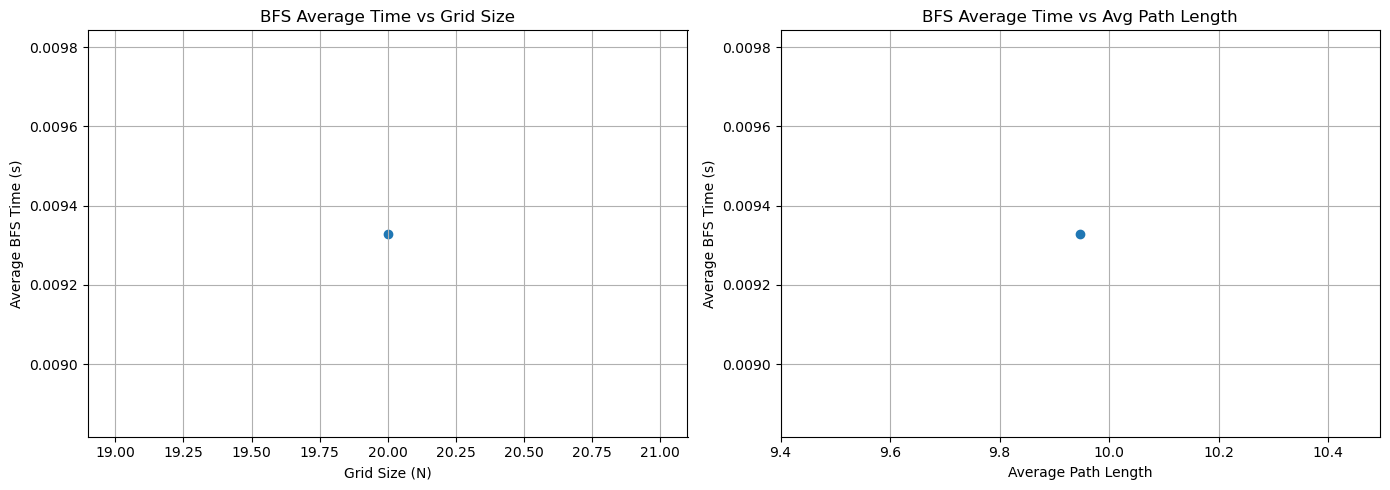

In [ ]:
def test_BFS_on_given_grids(graphs):
    """
    Groups graphs by grid size N, runs BFS, and returns:
    - list of sizes
    - avg times per size
    - avg lengths per size
    """

    # Dictionary: size → list of times and lengths
    stats = {}

    for grid, start, goal in graphs:
        N = grid.shape[0]  # grid is NxN

        if N not in stats:
            stats[N] = {"times": [], "lengths": []}

        t0 = now()
        result = BFS(grid, start, goal)
        dt = elapsed(t0)

        if result is None:
            continue

        stats[N]["times"].append(dt)
        stats[N]["lengths"].append(len(result))

    # Convert dict → sorted lists
    sizes = sorted(stats.keys())
    avg_times = [sum(stats[N]["times"]) / len(stats[N]["times"]) for N in sizes]
    avg_lengths = [sum(stats[N]["lengths"]) / len(stats[N]["lengths"]) for N in sizes]

    return sizes, avg_times, avg_lengths



def plot_performance_from_old(file_name):
    graphs = read_input_file(file_name)
    sizes, avg_times, avg_lengths = test_BFS_on_given_grids(graphs)

    # Group by unique sizes
    unique_sizes = sorted(list(set(sizes)))
    mean_times = []
    mean_lengths = []

    for s in unique_sizes:
        times_for_s = [t for size, t in zip(sizes, avg_times) if size == s]
        lengths_for_s = [l for size, l in zip(sizes, avg_lengths) if size == s]

        mean_times.append(np.mean(times_for_s))
        mean_lengths.append(np.mean(lengths_for_s))

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Plot BFS Average Time vs Grid Size
    axes[0].scatter(unique_sizes, mean_times)
    axes[0].plot(unique_sizes, mean_times)
    axes[0].set_title("BFS Average Time vs Grid Size")
    axes[0].set_xlabel("Grid Size (N)")
    axes[0].set_ylabel("Average BFS Time (s)")
    axes[0].grid(True)

    # Plot BFS Average Time vs Average Path Length
    axes[1].scatter(mean_lengths, mean_times)
    axes[1].plot(mean_lengths, mean_times)
    axes[1].set_title("BFS Average Time vs Avg Path Length")
    axes[1].set_xlabel("Average Path Length")
    axes[1].set_ylabel("Average BFS Time (s)")
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()


graph_file, result_file = get_graph_and_result_files("10_06_23", "../saved_graphs/10_06_23")
plot_performance_from_old(graph_file)